##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

In [1]:
import sys
sys.path.append('../')

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.generate_figures import plot_scatter_CMIP
from plants_and_TCR.analyze_data import multi_model_stats
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series

####################### Set up directory structure ######################
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

# Get data

In [ ]:
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['TOT','RAD','TOT-RAD','PHYS'],
                                                         average_types=['global','land','ocean'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=True)

bcc-csm1-1
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
CanESM2
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> del

In [3]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

In [4]:
ENDYR=70

land_tcrs = make_tcr_dataset.make_tcr_dataset(TCR_DICT, end_yr = ENDYR, average_type ='land',
                                              varname='tas')
nonland_tcrs = make_tcr_dataset.make_tcr_dataset(TCR_DICT, end_yr = ENDYR, average_type='ocean',
                                                 varname='tas')

yvals = land_tcrs['TOT']/nonland_tcrs['TOT']
xvals = land_tcrs['RAD']/nonland_tcrs['RAD']

### Plot figure

../plants_and_TCR/generate_figures/plot_scatter_CMIP.py:43: RuntimeWarning: Mean of empty slice
  multimodel_mean_yvals_CMIP6 = np.nanmean(yvals[CMIP6_CUTOFF:100])
../plants_and_TCR/generate_figures/plot_scatter_CMIP.py:44: RuntimeWarning: Mean of empty slice
  multimodel_mean_xvals_CMIP6 = np.nanmean(xvals[CMIP6_CUTOFF:100])
../plants_and_TCR/generate_figures/plot_scatter_CMIP.py:45: RuntimeWarning: Mean of empty slice
  multimodel_mean_yvals_CMIP5 = np.nanmean(yvals[0:CMIP6_CUTOFF])
../plants_and_TCR/generate_figures/plot_scatter_CMIP.py:46: RuntimeWarning: Mean of empty slice
  multimodel_mean_xvals_CMIP5 = np.nanmean(xvals[0:CMIP6_CUTOFF])


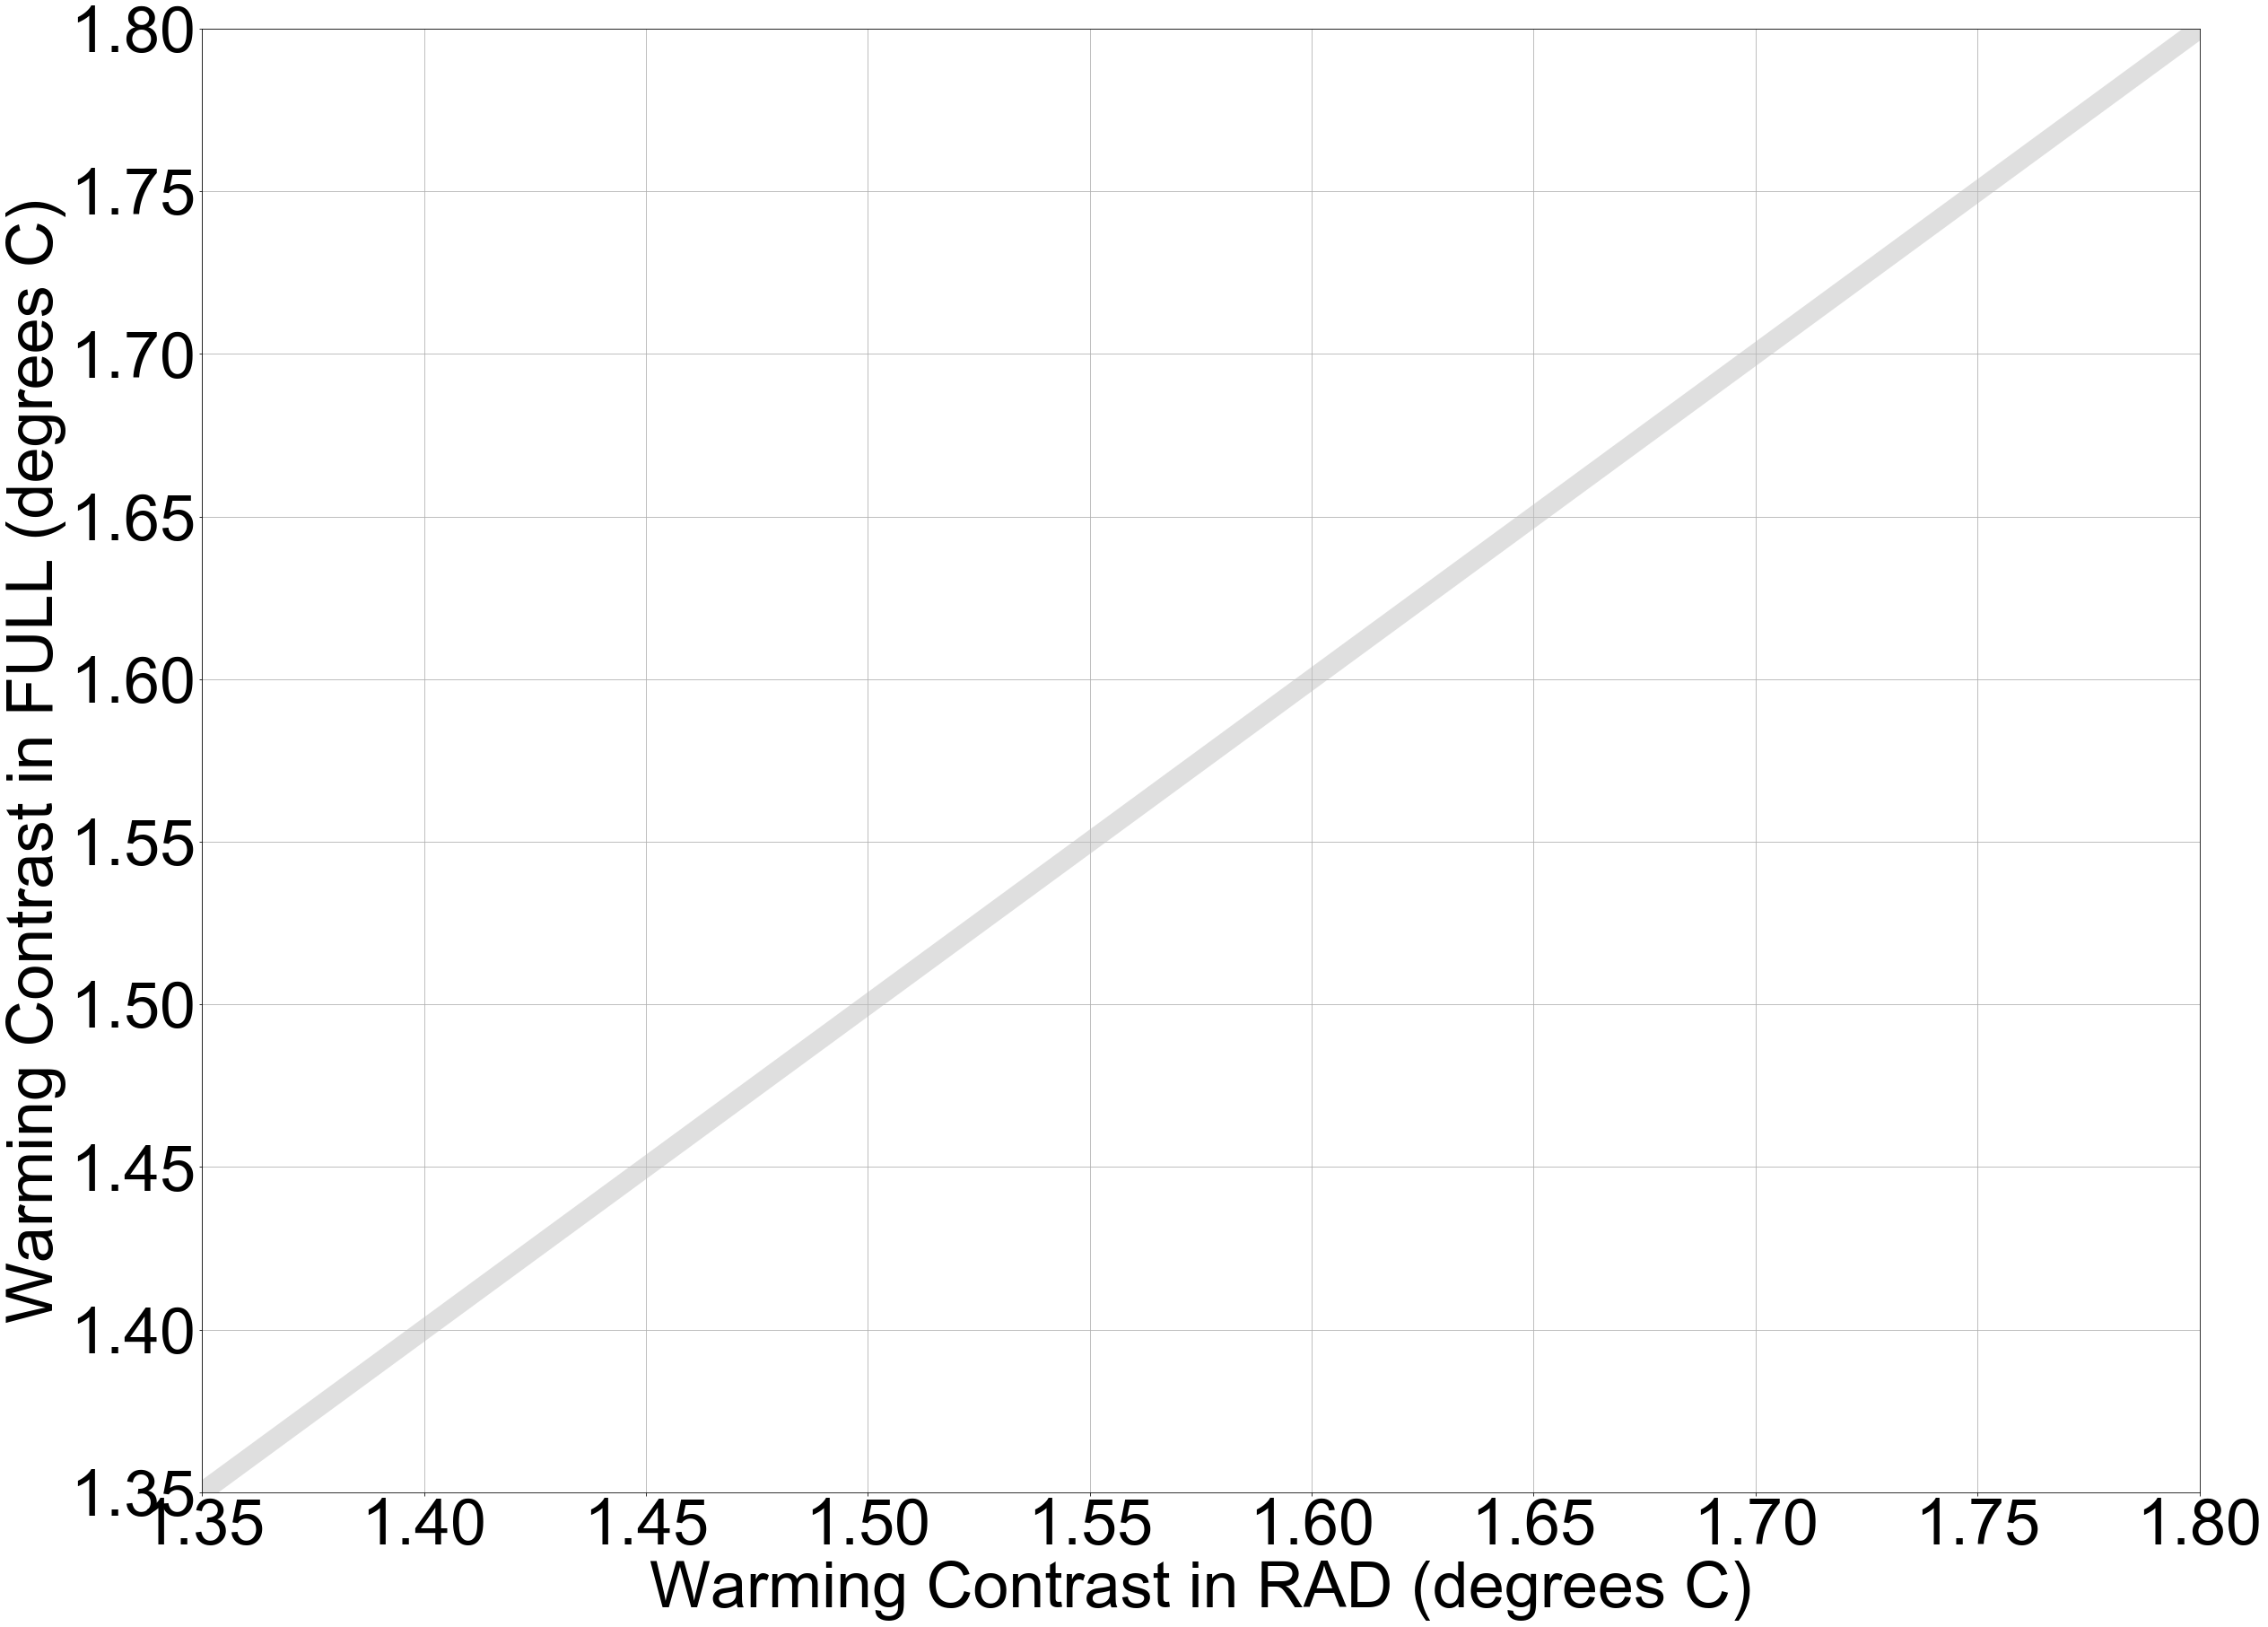

In [5]:
XLIMS = [1.35, 1.8]
XLABEL = 'Warming Contrast in RAD (degrees C)'
YLABEL = 'Warming Contrast in FULL (degrees C)'
FIGURE_PATH = directory_information.DIR_OUTPUT_FIGURES
import importlib
importlib.reload(plot_scatter_CMIP)
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    xlims=XLIMS, ylims=XLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, one_to_one_line=True,
                                    markersize=50,
                                    filepath=PATH_FIGURES+'Fig3_land_ocean_contrast')

In [21]:
yvals[8:100].mean()

1.6121627646986794

In [11]:
from plants_and_TCR.process_data import area_weighting
from plants_and_TCR.generate_figures import quick_map

In [12]:
ds = area_weighting.calculate_area_weightings('CESM2')

In [13]:
ds

<xarray.Dataset>
Dimensions:          (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
Dimensions without coordinates: nbnd
Data variables:
    areacella        (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    lat_bnds         (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds         (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    da_area          (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    da_land          (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    da_glac          (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    area_weights     (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    land_weights     (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    glacier_weights  (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    ocean_weights    (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            C4MIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  182500.0
    case_id:                59
    cesm_casename:          b.e21.B1PCT.f09_g17.CMIP6-1pctCO2-bgc.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-03-09T17:23:16Z
    data_specs_version:     01.00.29
    experiment:             biogeochemically-coupled version of 1 percent per...
    experiment_id:          1pctCO2-bgc
    forcing_index:          1
    frequency:              fx
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.1...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos land
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               fx
    tracking_id:            hdl:21.14100/a9bd9bb9-f7b0-47c3-a87d-6d3acd2f353f
    variable_id:            areacella
    variant_info:           Biogeochemically-coupled version of 1% per year i...
    variant_label:          r1i1p1f1
    landfrac:               0.2610348
    glacierfrac:            0.031943996
    nonlandfrac:            0.70702124

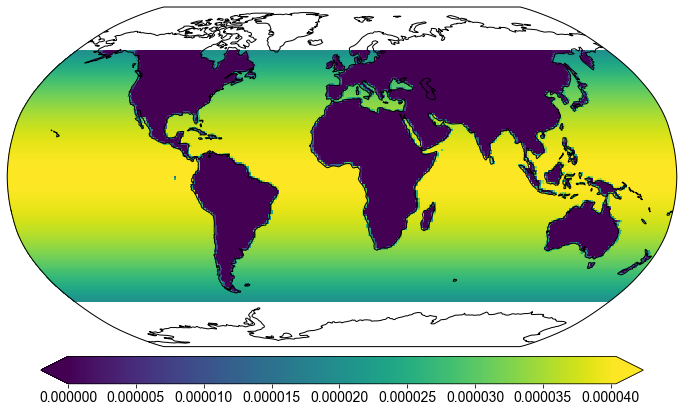

(<Figure size 864x648 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fe41a60e2b0>)

In [17]:
ds=ds.where(ds['lat']<60)
quick_map.quick_map(ds['ocean_weights'],ds['lat'],ds['lon'])